# Librerias

In [ ]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize
import copy
import scipy.linalg as la

# Taller 4

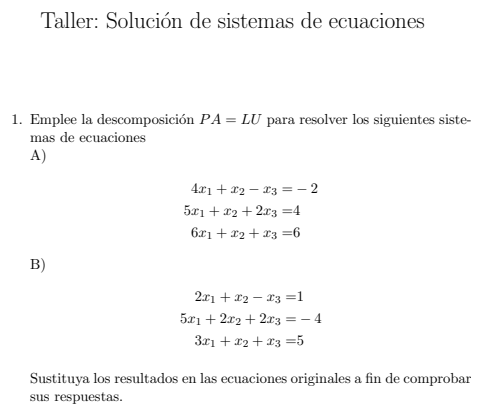

In [ ]:
def sustitucion_atras( A, b ):
  n = len(b)
  x = np.zeros(n)

  for i in range( -1, -n-1, -1):
    x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

  return x

def sustitucion_adelante(A, b):
  n = len(b)
  x = np.zeros(n)

  for i in range(0, n, 1):
    if i > 0:
      x[i] = (b[i] - np.dot(A[i, :i], x[:i])) / A[i, i]
    else:
      x[i] = b[i] / A[i, i]

  return x

def sol_plu(A, b):
  P, L, U = la.lu(A)

  c = np.matmul(np.transpose(P), b)
  d = sustitucion_adelante( L, c)
  x = sustitucion_atras(U, d)

  return x

# Matriz A

A =  np.array([[4, 1, -1],
             [5, 1,  2],
               [6, 1,  1]])

b = b = np.array([-2, 4, 6])

solucion = sol_plu(A, b)

print("Matriz: \n", A)
print("Vector independiente: \n", b)
print("Solucion del sistema: \n", solucion)
print("Verificacion del vector independiente: \n", A.dot(solucion))
print("\n")

# Matriz B

B =  np.array([[2, 1, -1],
               [5, 2,  2],
               [3, 1,  1]])

b = b = np.array([1, -4, 5])

solucion = sol_plu(B, b)

print("Matriz: \n", B)
print("Vector independiente: \n", b)
print("Solucion del sistema: \n", solucion)
print("Verificacion del vector independiente: \n", B.dot(solucion))

asdasdasd [ 0.          0.5        -0.83333333]
Matriz: 
 [[ 4  1 -1]
 [ 5  1  2]
 [ 6  1  1]]
Vector independiente: 
 [-2  4  6]
Solucion del sistema: 
 [  3. -13.   1.]
Verificacion del vector independiente: 
 [-2.  4.  6.]


Matriz: 
 [[ 2  1 -1]
 [ 5  2  2]
 [ 3  1  1]]
Vector independiente: 
 [ 1 -4  5]
Solucion del sistema: 
 [ 14. -32.  -5.]
Verificacion del vector independiente: 
 [ 1. -4.  5.]


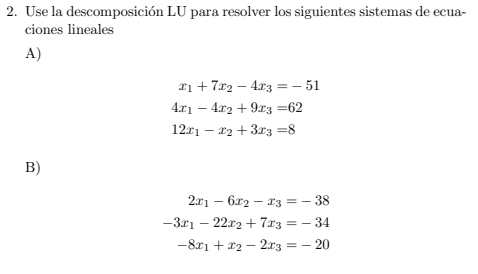

In [ ]:
def fact_lu(A):
    [n,m]=np.shape(A)
    U=copy.copy(A)
    L=np.identity(n)

    for j in range(0,n,1): # columna
      for i in range(j+1,n,1): # fila
        L[i,j]=U[i,j]/U[j,j]
        U[i,:]=U[i,:]+(-U[i,j]/U[j,j])*U[j,:]

    return L,U

def sol_lu(L,U,b):
  d = sustitucion_adelante(L,b)
  x = sustitucion_atras(U,d)
  return x

# Matriz A

A =  np.array([[1,  7, -4],
               [4,  -4, 9],
               [12, -1, 3]], float)

b = b = np.array([-51, 62, 8], float)

L, U = fact_lu(A)
solucion = sol_lu(L, U, b)

print("Matriz: \n", A)
print("Vector independiente: \n", b)
print("Solucion del sistema: \n", solucion)
print("Verificacion del vector independiente: \n", A.dot(solucion))
print("\n")

# Matriz B

B =  np.array([[2,  -6,  -1],
               [-3, -22,  7],
               [-8,  1,  -2]], float)

b = b = np.array([-38, -34, -20], float)

L, U = fact_lu(B)
solucion = sol_lu(L, U, b)

print("Matriz: \n", B)
print("Vector independiente: \n", b)
print("Solucion del sistema: \n", solucion)
print("Verificacion del vector independiente: \n", B.dot(solucion))

Matriz: 
 [[ 1.  7. -4.]
 [ 4. -4.  9.]
 [12. -1.  3.]]
Vector independiente: 
 [-51.  62.   8.]
Solucion del sistema: 
 [-1.06490872 -3.92292089  5.61866126]
Verificacion del vector independiente: 
 [-51.  62.   8.]


Matriz: 
 [[  2.  -6.  -1.]
 [ -3. -22.   7.]
 [ -8.   1.  -2.]]
Vector independiente: 
 [-38. -34. -20.]
Solucion del sistema: 
 [ 0.5056  4.7744 10.3648]
Verificacion del vector independiente: 
 [-38. -34. -20.]


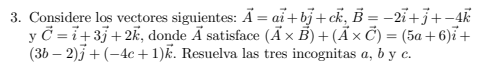

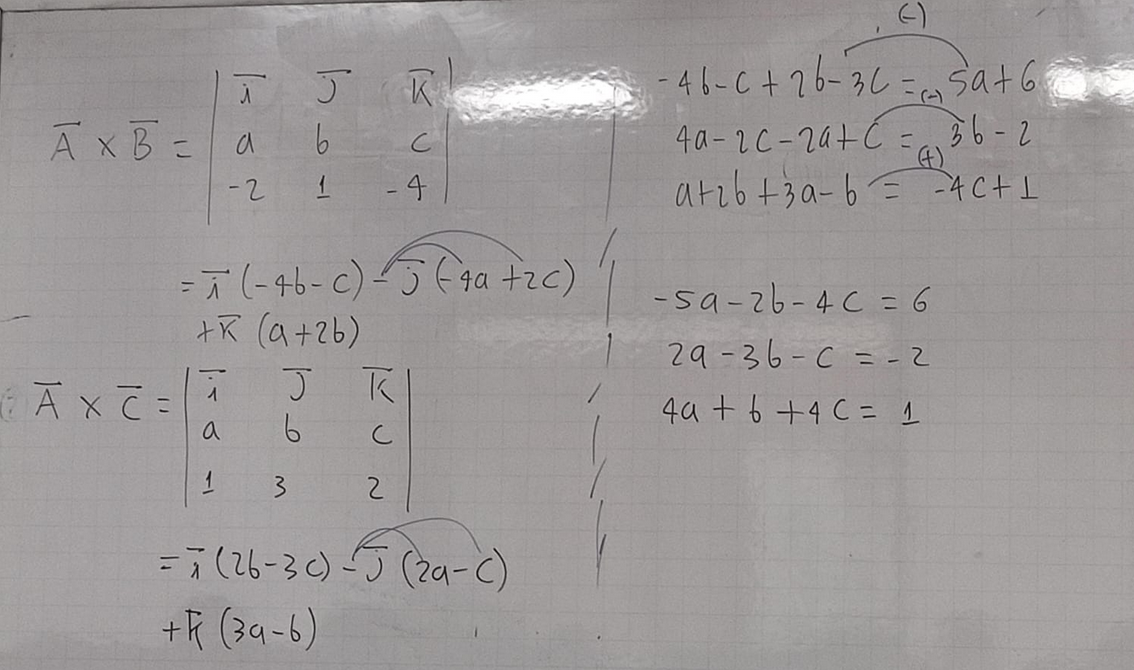

In [ ]:
import sympy as sp

a, b, c = sp.symbols('a b c')

A = sp.Matrix([a, b, c])
B = sp.Matrix([-2, 1, -4])
C = sp.Matrix([1, 3, 2])

AB = A.cross(B)
print("A x B: ", AB)
AC = A.cross(C)
print("A x C: ", AC)

ecuacion = AB + AC - ((5*a + 6) * sp.Matrix([1, 0, 0]) + (3*b - 2) * sp.Matrix([0, 1, 0]) + (-4*c + 1) * sp.Matrix([0, 0, 1]))
print("Sistema de ecuacion lineal: ", ecuacion)

solution = sp.solve(ecuacion, (a, b, c))

print("Valores de a, b y c con sympy:")
print("a =", solution[a])
print("b =", solution[b])
print("c =", solution[c])
print("\n")

B =  np.array([[-5, -2, -4],
               [2,  -3, -1],
               [4,  1,  4]])

b = b = np.array([6, -2, 1])

solucion = sol_plu(B, b)

print("Matriz: \n", B)
print("Vector independiente: \n", b)
print("Valores de a, b y c con factorizacion PLU: \n", solucion)
print("Verificacion del vector independiente: \n", B.dot(solucion))


A x B:  Matrix([[-4*b - c], [4*a - 2*c], [a + 2*b]])
A x C:  Matrix([[2*b - 3*c], [-2*a + c], [3*a - b]])
Sistema de ecuacion lineal:  Matrix([[-5*a - 2*b - 4*c - 6], [2*a - 3*b - c + 2], [4*a + b + 4*c - 1]])
Valores de a, b y c con sympy:
a = -84/23
b = -77/23
c = 109/23


Matriz: 
 [[-5 -2 -4]
 [ 2 -3 -1]
 [ 4  1  4]]
Vector independiente: 
 [ 6 -2  1]
Valores de a, b y c con factorizacion PLU: 
 [-3.65217391 -3.34782609  4.73913043]
Verificacion del vector independiente: 
 [ 6. -2.  1.]


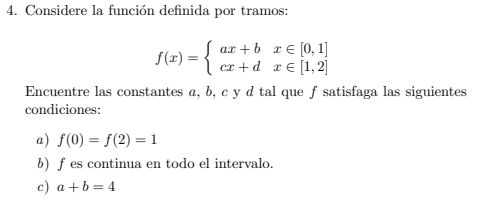

**Problema:**

Considere la función definida por tramos:

$$f(x)=\begin{cases}
ax+b & x\in[0,1]\\
cx+d & x\in[1,2]
\end{cases}$$

Encuentre las constantes $a$, $b$, $c$ y $d$ tal que $f$ satisfaga las siguientes condiciones:

a) $f(0)=f(2)=1$

b) $f$ es continua en todo el intervalo.

c) $a+b=4$

**Solución:**

Para resolver este problema, podemos utilizar las siguientes ecuaciones:

**Ecuación 1:** $f(0) = a(0) + b = b = 1$

**Ecuación 2:** $f(2) = c(2) + d = 2c + d = 1$

**Ecuación 3:** Para que $f$ sea continua en todo el intervalo, debemos asegurarnos de que las expresiones $ax+b$ y $cx+d$ sean iguales en el punto $x=1$. Esto significa que:

$$a+b = c+d$$

**Ecuación 4:** La ecuación $a+b=4$ nos proporciona una información adicional sobre las constantes.

Sustituyendo la Ecuación 1 en la Ecuación 3, obtenemos:

$$a + 1 = c + d$$

Ahora tenemos un sistema de cuatro ecuaciones con cuatro incógnitas:

$$a + 1 = c + d$$
$$2c + d = 1$$
$$b = 1$$
$$a + b = 4$$

Por lo tanto si sustituimos b en la 4 incognita sabemos que $a = 3$:

$$ 3 + 1 = 4$$

Resolviendo este sistema de ecuaciones, podemos encontrar los valores de $a$, $b$, $c$ y $d$.

Podemos resolver el sistema de ecuaciones utilizando el método de sustitución.

Como ya sabemos los valores de $a$ y $b$ tenemos:

$$a+b = c+d$$
$$a+1 = c+d$$
$$3+1 = c+d$$
$$4 = c+d$$

Ahora despejamos $c$ de la ultima ecuación

$$c = 4 - d$$

Sustituimos esta expresión en la segunda ecuación:

$$2(4 - d) + d = 1$$

Simplificamos la asosiacion:

$$8 - 2d + d = 1$$
$$8 - d = 1$$

Despejamos $d$ de la última ecuación:

$$ -d = 1 - 8 $$
$$ d = -(1 - 8) $$
$$ d = 7 $$

Sustituimos esta expresión en la ecuación que verifica que $f$ sea continua en todo el intervalo para obtener el valor de $c$:

$$ 4 = c + 7$$

Volvemos a despejar $c$:

$$ 4 = c + 7$$

Despejamos $c$:

$$ 4 - 7 = c $$

Por ultimo obtenemos:

$$ -3 = c $$

**Interpretación de las soluciones:**

$$a = 3$$
$$b = 1$$
$$c = -3$$
$$d = 7$$

Sustituyendo estos valores en las expresiones de $f(x)$, obtenemos:

$$f(x)=\begin{cases}
ax+b & x\in[0,1]\\
cx+d & x\in[1,2]
\end{cases}$$

Esta función satisface las condiciones del problema:

* $f(0) = 3(0) + 1 = 1$
* $f(2) = -3(2) + 7 = 1$
* $f(x)$ es continua en todo el intervalo $[0,2]$

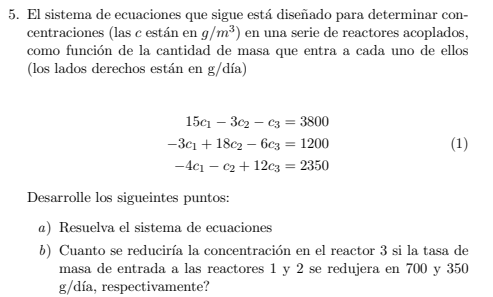

In [ ]:
A =  np.array([[15, -3, -1],
               [-3,  18, -6],
               [-4,  -1,  12]])

b = b = np.array([3800, 1200, 2350])

solucion = np.linalg.solve(B, b)

print("Matriz: \n", B)
print("Vector independiente: \n", b)
print("Valores de a, b y c con factorizacion PLU: \n", solucion)
print("Verificacion del vector independiente: \n", B.dot(solucion))
print("\n")

A =  np.array([[15, -3, -1],
               [-3,  18, -6],
               [-4,  -1,  12]])

b = b = np.array([3800 - 700, 1200 - 350, 2350])

solucion = np.linalg.solve(B, b)

print("Matriz: \n", B)
print("Vector independiente: \n", b)
print("Valores de a, b y c con factorizacion PLU: \n", solucion)
print("Verificacion del vector independiente: \n", B.dot(solucion))

Matriz: 
 [[-5 -2 -4]
 [ 2 -3 -1]
 [ 4  1  4]]
Vector independiente: 
 [3800 1200 2350]
Valores de a, b y c con factorizacion PLU: 
 [-2630.43478261 -3519.56521739  4097.82608696]
Verificacion del vector independiente: 
 [3800. 1200. 2350.]


Matriz: 
 [[-5 -2 -4]
 [ 2 -3 -1]
 [ 4  1  4]]
Vector independiente: 
 [3100  850 2350]
Valores de a, b y c con factorizacion PLU: 
 [-2356.52173913 -3093.47826087  3717.39130435]
Verificacion del vector independiente: 
 [3100.  850. 2350.]


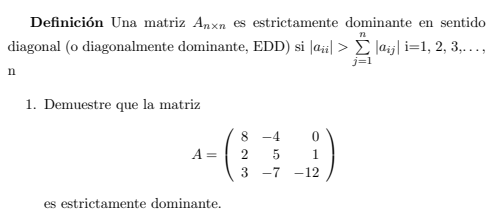

## Solución del problema

**1. Demostración de que la matriz A es estrictamente dominante**

Para demostrar que la matriz A es estrictamente dominante, debemos verificar que cada elemento de la diagonal principal sea estrictamente mayor que la suma de los valores absolutos de los demás elementos de su fila.

**Fila 1:**

* Elemento diagonal: $|a_{11}| = 8$
* Suma de los valores absolutos de los demás elementos: $|a_{12}| + |a_{13}| = |-4| + |0| = 4$

Como $8 > 5$, el elemento diagonal de la fila 1 es mayor que la suma de los valores absolutos de los demás elementos.

**Fila 2:**

* Elemento diagonal: $|a_{22}| = 5$
* Suma de los valores absolutos de los demás elementos: $|a_{21}| + |a_{23}| = |2| + |1| = 3$

Como $1 > 3$, el elemento diagonal de la fila 2 es mayor que la suma de los valores absolutos de los demás elementos.

**Fila 3:**

* Elemento diagonal: $|a_{33}| = 12$
* Suma de los valores absolutos de los demás elementos: $|a_{31}| + |a_{32}| = |3| + |-7| = 10$

Como
$$8 > 4$$
$$5 > 3$$
$$12 > 10$$

Se cumple la condicion para que la matriz tenga una diagonal estrictamente dominante.

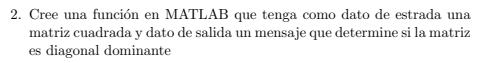

In [ ]:
def es_diagonal_dominante(matriz):
    filas, columnas = matriz.shape
    es_diagonal_dominante = True

    for i in range(filas):
        suma_abs = 0
        diagonal = abs(matriz[i, i])

        for j in range(columnas):
            if j != i:
                suma_abs += abs(matriz[i, j])

        if diagonal <= suma_abs:
            es_diagonal_dominante = False
            break

    return es_diagonal_dominante

matriz = np.array([[8, -4,   0],
                   [2,  5,   1],
                   [3, -7, -12]])

resultado = es_diagonal_dominante(matriz)



if resultado:
    print("La matriz es diagonal dominante.")
else:
    print("La matriz no es diagonal dominante.")

La matriz es diagonal dominante.


# Taller 5

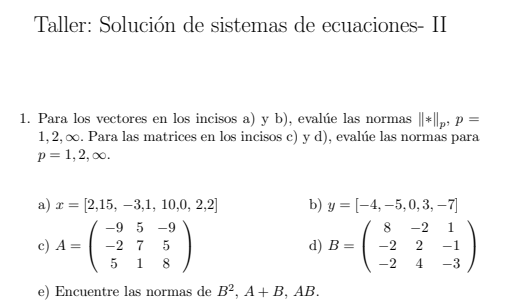

In [ ]:
def normas_vectoriales(x, p):
  if p < 0:
    raise ValueError("Error")

  if p == 1:
    ans = np.abs(x).sum()
  elif p == 2:
    ans = np.sqrt(np.sum(x**2))
  else:
    ans = np.abs(x).max()

  return ans

def normas_matriciales(A, p): # Tambien conocidas como inducidas
  ans = 0
  if p == 1:
    return max(sum(abs(A)))
  elif p == 2:
    B = np.matmul(np.transpose(A), A)  # A^tA
    val_p, vec_p = np.linalg.eig(B)  # Hallar los valores propios
    return np.sqrt(max(np.abs(val_p)))  # APlicar el maximo de los valores con la raiz cuadrada
  else:
    return max(sum(abs(np.transpose(A))))

  return ans

p_values = [1, 2, np.inf]

x = np.array([2, 15, -3, 1, 10, 0, 2, 2])

for p in p_values:
  result = normas_vectoriales(x.copy(), p)
  print(f"p-norm of x for p={p}: {result:.4f}")
print("")

y = np.array([-4, -5, 0, 3, -7])

for p in p_values:
  result = normas_vectoriales(y.copy(), p)
  print(f"p-norm of y for p={p}: {result:.4f}")
print("")

A = np.array([[-9,  5,  -9],
              [-2,  7,   5],
              [ 5,  1,   8]])

for p in p_values:
  result = normas_matriciales(A.copy(), p)
  print(f"p-norm of A for p={p}: {result:.4f}")
print("")

B = np.array([[8,  -2,   1],
              [-2,  2,  -1],
              [-2,  4,  -3]])

for p in p_values:
  result = normas_matriciales(B.copy(), p)
  print(f"p-norm of B for p={p}: {result:.4f}")
print("")

E = B.dot(B)

for p in p_values:
  result = normas_matriciales(E.copy(), p)
  print(f"p-norm of E for p={p}: {result:.4f}")
print("")

F = A + B

for p in p_values:
  result = normas_matriciales(F.copy(), p)
  print(f"p-norm of F for p={p}: {result:.4f}")
print("")

G = A.dot(B)

for p in p_values:
  result = normas_matriciales(G.copy(), p)
  print(f"p-norm of G for p={p}: {result:.4f}")
print("")

p-norm of x for p=1: 35.0000
p-norm of x for p=2: 18.6279
p-norm of x for p=inf: 15.0000

p-norm of y for p=1: 19.0000
p-norm of y for p=2: 9.9499
p-norm of y for p=inf: 7.0000

p-norm of A for p=1: 22.0000
p-norm of A for p=2: 16.1737
p-norm of A for p=inf: 23.0000

p-norm of B for p=1: 12.0000
p-norm of B for p=2: 9.5180
p-norm of B for p=inf: 11.0000

p-norm of E for p=1: 102.0000
p-norm of E for p=2: 72.7756
p-norm of E for p=inf: 89.0000

p-norm of F for p=1: 17.0000
p-norm of F for p=2: 12.2018
p-norm of F for p=inf: 17.0000

p-norm of G for p=1: 126.0000
p-norm of G for p=2: 78.9917
p-norm of G for p=inf: 102.0000



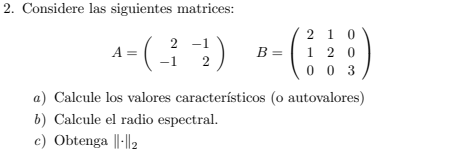

In [ ]:
A = np.array([[2,  -1],
              [-1,  2]])

# Calculamos los valores característicos
valores_caracteristicos, vectores_caracteristicos = np.linalg.eig(A)
print("Valores característicos:", valores_caracteristicos)

# Calculamos el radio espectral
radio_espectral = max(np.abs(valores_caracteristicos))
print("Radio espectral:", radio_espectral)

# Norma matricial p = 2
result = normas_matriciales(A.copy(), 2)
print(f"p-norm of A for p={2}: {result:.4f}")
print("")

B = np.array([[2, 1, 0],
              [1, 2, 0],
              [0, 0, 3]])

# Calculamos los valores característicos
valores_caracteristicos, vectores_caracteristicos = np.linalg.eig(B)
print("Valores característicos:", valores_caracteristicos)

# Calculamos el radio espectral
radio_espectral = max(np.abs(valores_caracteristicos))

print("Radio espectral:", radio_espectral)

# Norma matricial p = 2
result = normas_matriciales(B.copy(), 2)
print(f"p-norm of A for p={2}: {result:.4f}")



Valores característicos: [3. 1.]
Radio espectral: 3.0
p-norm of A for p=2: 3.0000

Valores característicos: [3. 1. 3.]
Radio espectral: 3.0
p-norm of A for p=2: 3.0000


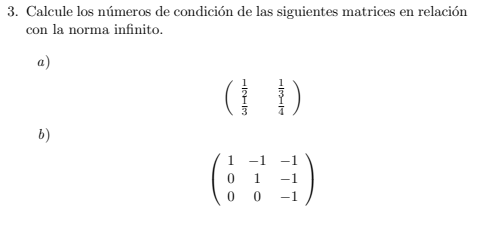

In [ ]:
def calculate_k_norm(A, norm_type):
    if np.linalg.det(A) == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    if norm_type == '1':
        norm_A = np.linalg.norm(A, ord=1)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=1)
    elif norm_type == '2':
        norm_A = np.linalg.norm(A, ord=2)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=2)
    elif norm_type == 'inf':
        norm_A = np.linalg.norm(A, ord=np.inf)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=np.inf)
    else:
        raise ValueError("Invalid norm type. Please choose from '1', '2', or 'inf'.")

    k_norm = norm_A * norm_A_inv
    return k_norm

def numero_condicion1(A,p):
  A_inv = np.linalg.inv(A)
  return normas_matriciales(A,p)*normas_matriciales(A_inv,p)

def numero_condicion2(A,p):
  A_inv = np.linalg.inv(A)
  return np.linalg.norm(A,p)*np.linalg.norm(A_inv,p)

def numero_condicion3(A,p):
  return np.linalg.cond(A, np.inf)

A = np.array([[1/2, 1/3],
              [1/3, 1/4]])

b = np.array([[1/2],[1/4]])
b_1 = np.array([[1/3],[1/3]])
x1 = np.linalg.solve(A,b)
x2 = np.linalg.solve(A,b_1)
print(x1,x2)

print("Numero de condicion de la matriz A: ", numero_condicion1(A, np.inf))
print("Numero de condicion de la matriz A: ", calculate_k_norm(A, "inf"))
print("")

B = np.array([[1, -1, -1],
              [0, 1, -1],
              [0, 0, -1]])

print("Numero de condicion de la matriz A: ", numero_condicion1(B, np.inf))
print("Numero de condicion de la matriz B: ", calculate_k_norm(B, "inf"))


[[ 3.]
 [-3.]] [[-2.]
 [ 4.]]
Numero de condicion de la matriz A:  49.99999999999997
Numero de condicion de la matriz A:  49.99999999999997

Numero de condicion de la matriz A:  12.0
Numero de condicion de la matriz B:  12.0


# Taller 6

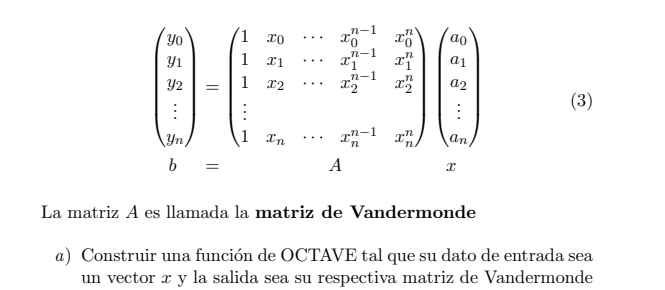

In [ ]:
def vandermonde1(x):
    n = len(x)
    v = np.zeros((n, n))
    for i in range(n):
        v[i] = x**i

    return v

def vandermonde2(x):
    return np.vander(x, increasing=True)

x = np.array([1, 2, 3], float)

print(vandermonde2(x))

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


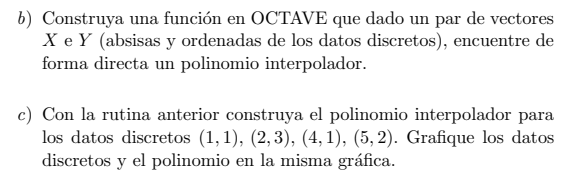

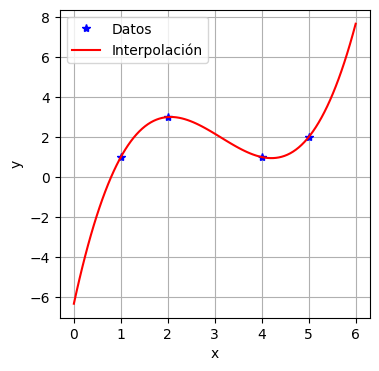

In [ ]:
def mat_new(x, y):
    n = len(x)
    L = np.zeros((n, n))
    L[:, 0] = np.ones((1, n))
    for j in range(1, n):
        for i in range(j, n):
            pro = 1
            for k in range(0, j):
                pro = pro * (x[i] - x[k])
            L[i, j] = pro
    c = np.linalg.solve(L, y)
    return L, c

def poli_new(x, c, x_var):
    n = len(c)
    result = c[0]
    for i in range(1, n):
        term = c[i]
        for j in range(i):
            term *= (x_var - x[j])
        result += term
    return result

x = np.array([1,2,4,5], float)
y = np.array([1,3,1,2], float)
[L, c] = mat_new(x, y)

x_interp = np.linspace(0, 6, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

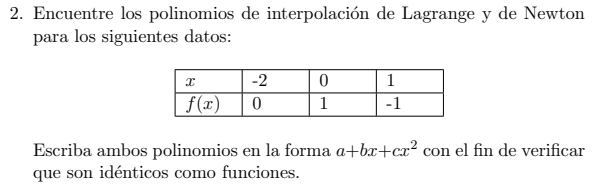

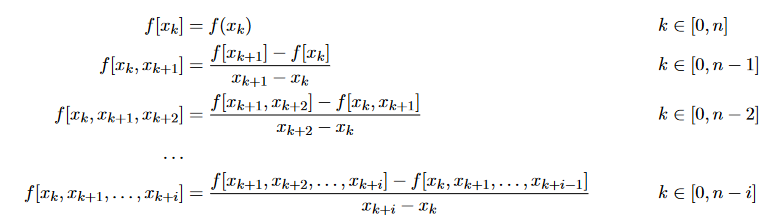

## La imagen contiene la siguiente información:

**Título:** Polinomio de interpolacion de Newton

**Para los siguientes datos**

$$
\begin{array}{|c|c|}
\hline
x & f(x) \\
\hline
-2 & 0 \\
0 & 1 \\
1 & -1 \\
\hline
\end{array}
$$

**Ecuación general de un polinomio de segundo grado:**

$$
P_2(x) = C_0 + C_1(x - X_0) + C_2(x - X_0)(x - X_1)
$$

**Sistema de ecuaciones para encontrar los valores de $C_0$, $C_1$ y $C_2$:**

**De la forma:**

$$
L = \begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
1 & (x_1 - x_0) & 0 & \dots & 0 \\
1 & (x_2 - x_0) & (x_2 - x_0)(x_2 - x_1) & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & (x_n - x_0) & (x_n - x_0)(x_n - x_1) & \dots & \prod_{i=0}^{n-1}(x_n - x_{n-1})
\end{bmatrix}
$$

**Solucion**

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & (0 - (-2)) & 0 \\
1 & ( 1 - (-2)) & ( 1 - (-2))( 1 - 0)
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
1 & 2 & 0 \\
1 & 3 & 3
\end{pmatrix}
$$

**Por lo que tenemos:**

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 2 & 0 \\
1 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
C_0 \\
C_1 \\
C_2
\end{pmatrix}
=
\begin{pmatrix}
Y_0 \\
Y_1 \\
Y_2
\end{pmatrix}
$$

**Solución del sistema de ecuaciones siguiendo la ecuacion:**

$$x_i = \frac{y_i - \sum_{j=0}^{i-1} L_{ij}c_j}{L_{ii}}$$

$$
C_0 = \frac{ y_0}{L_{00}}\  = \frac{0}{1}\ = 0\\
C_1 = \frac{ y_1 - (L_{10} * c_{0}) }{L_{11}}\  = \frac{1 - ( 1 * 0 )}{2}\ = 0.5\\
C_2 = \frac{ y_2 - (L_{21} * c_{1} + L_{20} * c_{0}) }{L_{22}}\  = \frac{-1 - ( 3 * 0.5 + 1 * 0 )}{2}\ = -0.83\\
$$

1. Sustituir los valores de los puntos en la ecuación general del polinomio:

$$
P_2(x) = 0 + 0.5(x + 2) + (-0.83)(x + 2)(x - 0)
$$

2. Sustituir los valores de los puntos en el sistema de ecuaciones para encontrar los valores de C_0, C_1 y C_2:

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 2 & 0 \\
1 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
0 \\
0.5 \\
-0.83
\end{pmatrix}
=
\begin{pmatrix}
0 \\
1 \\
-1
\end{pmatrix}
$$

3. Resolver el sistema de ecuaciones:

$$
C_0 = 0 \\
C_1 = 0.5 \\
C_2 = -0.83
$$

**Ecuación final del polinomio:**

$$
P_2(x) = 1 - 1.16x - 0.83x^2
$$

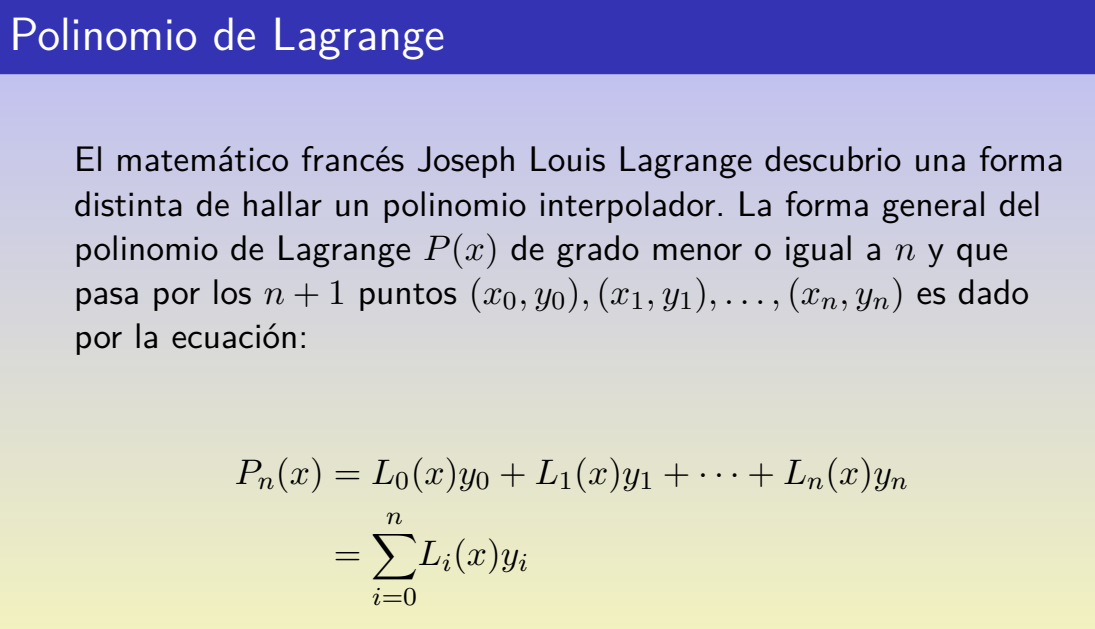

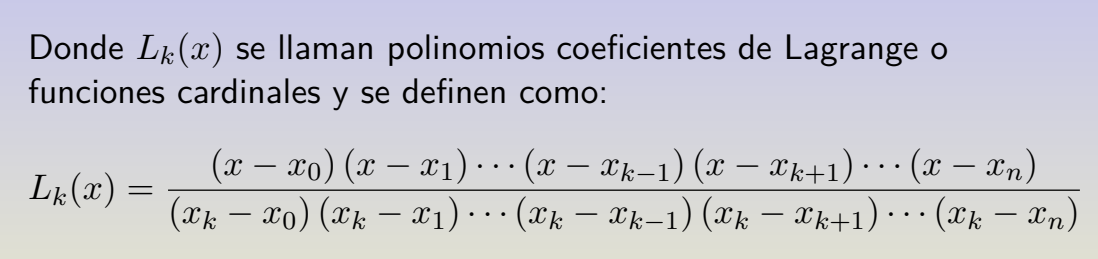

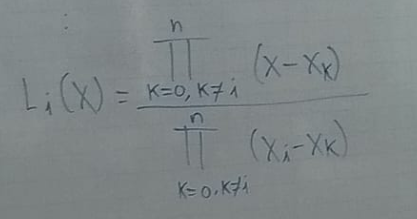

**DATOS**

$$
\begin{array}{|c|c|}
\hline
x & f(x) \\
\hline
-2 & 0 \\
0 & 1 \\
1 & -1 \\
\hline
\end{array}
$$

**Ecuación general de un polinomio de segundo grado:**

$$
P_n(x) = L_0(x)y_0 + L_1(x)y_1 + \dots + L_n(x)y_n
$$

**Formula de los $L_k(x)$**

$$L_k(x) = \frac{(x - x_0)(x - x_1) \dots (x - x_{k-1})(x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0)(x_k - x_1) \dots (x_k - x_{k-1})(x_k - x_{k+1}) \dots (x_k - x_n)}$$

**Solucion:**

$$L_0 = \frac{ (x - 0)(x - 1) }{ (-2 - 1)(-2 - 0) }\  = \frac{x^2-x}{6}$$
$$L_1 = \frac{ (x + 2)(x - 1) }{ (0 + 2)(0 - 1)}\  = -\frac{x^2+x-2}{2}\ $$
$$L_2 = \frac{ (x + 2)(x - 0) }{ (1 + 2)(1 - 0)}\  = \frac{x^2+2x}{3}\ $$

**Sustitucion de la ecuacion del polinomio**

$$P_2(x) = \frac{x^2-x}{6}0 + -\frac{x^2+x-2}{2}1 + \frac{x^2+2x}{3}(-1)$$

**Simplificando**

$$P_2(x) = \frac{-5x^2-7x+6}{6} = 1 - 1.16x - 0.83x^2$$

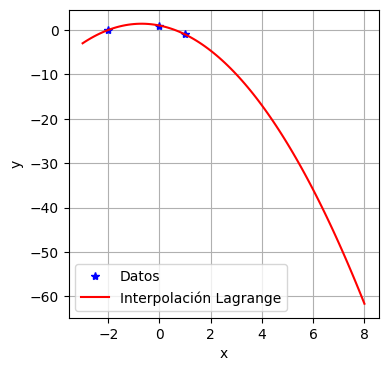

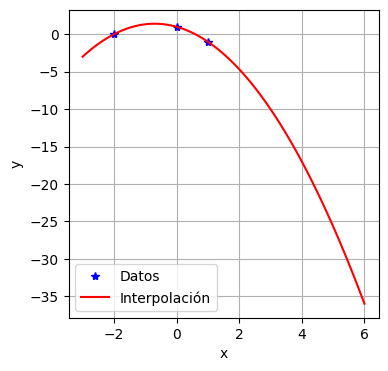

In [ ]:
def lagrange_polynomial(x, y, x_var):
    n = len(x)
    result = 0
    for j in range(n):
        L = 1
        for i in range(n):
            if i != j:
                L *= (x_var - x[i]) / (x[j] - x[i])
        result += y[j] * L
    return result

x = np.array([-2, 0, 1], float)
y = np.array([0, 1, -1], float)

x_interp = np.linspace(-3, 8, 100)
y_interp = lagrange_polynomial(x, y, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


x = np.array([-2, 0, 1], float)
y = np.array([0, 1, -1], float)

[L, c] = mat_new(x, y)

x_interp = np.linspace(-3, 6, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

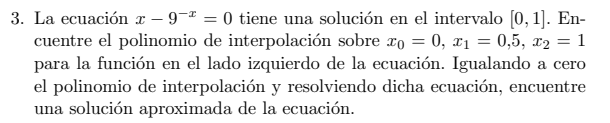

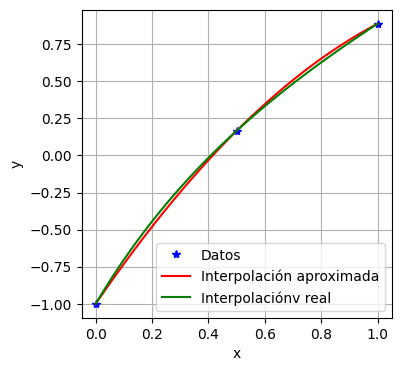

In [ ]:
x = np.array([0, 0.5, 1], float)
y = np.array([-1, 1/6, 8/9], float)

def real(x): #funcion real de los datos
    return x - (9**(-x))

[L, c] = mat_new(x, y)

x_interp = np.linspace(0, 1, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación aproximada')
plt.plot(x_interp, real(x_interp), 'g', label='Interpolaciónv real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

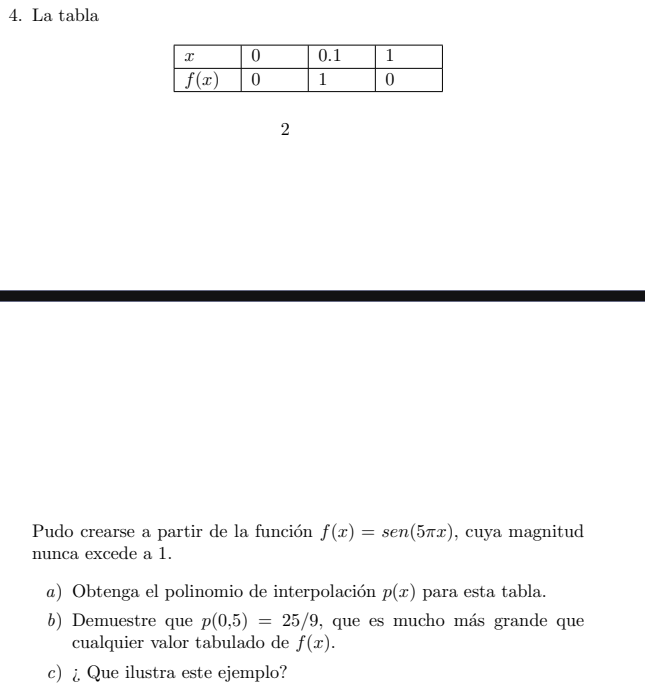

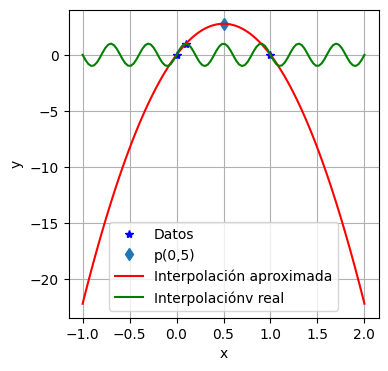

In [ ]:
x = np.array([0,0.1,1], float)
y = np.array([0,1,0], float)

def real(x): #funcion real de los datos
    return np.sin(5*np.pi*x)

[L, c] = mat_new(x, y)

x_interp = np.linspace(-1, 2, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(0.5, poli_new(x, c, 0.5), 'd', label='p(0,5)')
plt.plot(x_interp, y_interp, 'r', label='Interpolación aproximada')
plt.plot(x_interp, real(x_interp), 'g', label='Interpolaciónv real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

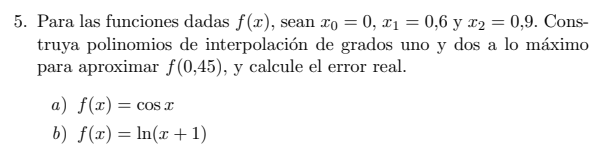

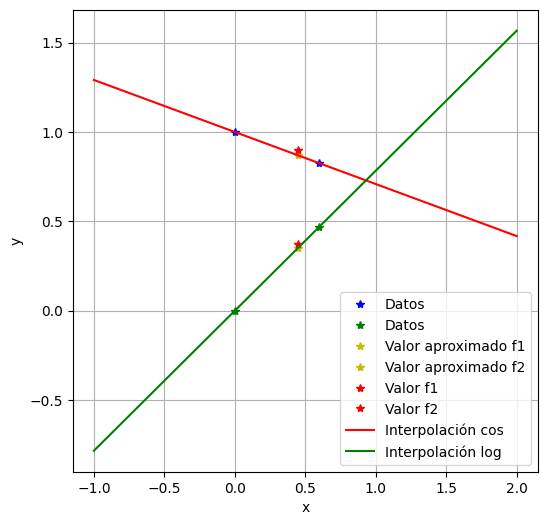

Para f(x) = cos(x), la aproximación es 0.8690017111822588 y el error real es 0.03144539117041811
Para f(x) = ln(x + 1), la aproximación es 0.3525027219343017 y el error real es 0.0190608344981813


In [ ]:
# Definimos las funciones
def f1(x):
    return np.cos(x)

def f2(x):
    return np.log(x + 1)

# Definimos los puntos iniciales del polinomio de grado 1
x_points = np.array([0, 0.6])
y_points_f1 = f1(x_points)
y_points_f2 = f2(x_points)

# Construimos los polinomios de interpolación
x_interp = np.linspace(-1, 2, 100)
poly_f1 = lagrange_polynomial(x_points, y_points_f1, x_interp)
poly_f2 = lagrange_polynomial(x_points, y_points_f2, x_interp)


# Aproximamos f(0.45) usando los polinomios de interpolación
approx_f1 = lagrange_polynomial(x_points, y_points_f1, 0.45)
approx_f2 = lagrange_polynomial(x_points, y_points_f2, 0.45)

plt.figure(figsize=[6, 6])
plt.plot(x_points, y_points_f1, 'b*', label='Datos')
plt.plot(x_points, y_points_f2, 'g*', label='Datos')
plt.plot(0.45, approx_f1 , 'y*', label='Valor aproximado f1')
plt.plot(0.45, approx_f2 , 'y*', label='Valor aproximado f2')
plt.plot(0.45, f1(0.45) , 'r*', label='Valor f1')
plt.plot(0.45, f2(0.45) , 'r*', label='Valor f2')
plt.plot(x_interp, poly_f1, 'r', label='Interpolación cos')
plt.plot(x_interp, poly_f2, 'g', label='Interpolación log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Calculamos el error real
real_error_f1 = abs(f1(0.45) - approx_f1)
real_error_f2 = abs(f2(0.45) - approx_f2)

print(f"Para f(x) = cos(x), la aproximación es {approx_f1} y el error real es {real_error_f1}")
print(f"Para f(x) = ln(x + 1), la aproximación es {approx_f2} y el error real es {real_error_f2}")

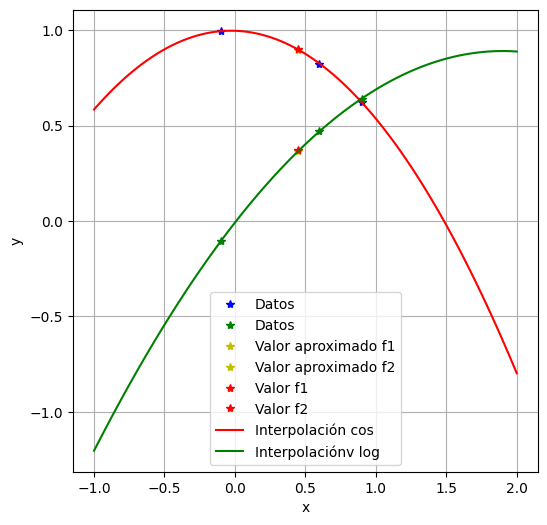

Para f(x) = cos(x), la aproximación es 0.8977210636637836 y el error real es 0.0027260386888933175
Para f(x) = ln(x + 1), la aproximación es 0.3672632660466324 y el error real es 0.004300290385850614


In [ ]:
# Definimos los puntos iniciales del polinomio de grado 2
x_points = np.array([-0.1, 0.6, 0.9])
y_points_f1 = f1(x_points)
y_points_f2 = f2(x_points)

# Construimos los polinomios de interpolación
x_interp = np.linspace(-1, 2, 100)
poly_f1 = lagrange_polynomial(x_points, y_points_f1, x_interp)
poly_f2 = lagrange_polynomial(x_points, y_points_f2, x_interp)

# Aproximamos f(0.45) usando los polinomios de interpolación
approx_f1 = lagrange_polynomial(x_points, y_points_f1, 0.45)
approx_f2 = lagrange_polynomial(x_points, y_points_f2, 0.45)

plt.figure(figsize=[6, 6])
plt.plot(x_points, y_points_f1, 'b*', label='Datos')
plt.plot(x_points, y_points_f2, 'g*', label='Datos')
plt.plot(0.45, approx_f1 , 'y*', label='Valor aproximado f1')
plt.plot(0.45, approx_f2 , 'y*', label='Valor aproximado f2')
plt.plot(0.45, f1(0.45) , 'r*', label='Valor f1')
plt.plot(0.45, f2(0.45) , 'r*', label='Valor f2')
plt.plot(x_interp, poly_f1, 'r', label='Interpolación cos')
plt.plot(x_interp, poly_f2, 'g', label='Interpolaciónv log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Calculamos el error real
real_error_f1 = abs(f1(0.45) - approx_f1)
real_error_f2 = abs(f2(0.45) - approx_f2)

print(f"Para f(x) = cos(x), la aproximación es {approx_f1} y el error real es {real_error_f1}")
print(f"Para f(x) = ln(x + 1), la aproximación es {approx_f2} y el error real es {real_error_f2}")

image.png

In [ ]:
# No visto en clase

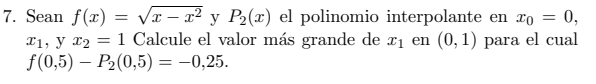

In [ ]:
def f(x):
    return np.sqrt(x - x**2)

x0, x2 = 0, 1
x1 = 0.5  # Valor inicial de x1
epsilon = 1e-6  # Tolerancia para la convergencia
max_iter = 1000  # Número máximo de iteraciones

for _ in range(max_iter):
    # Calcular P_2(x)
    x = np.array([x0, x1, x2])
    y = f(x)
    P_2 = lagrange_polynomial(x, y, 0.5)

    # Calcular la diferencia entre f(0.5) y P_2
    diff = f(0.5) - P_2

    # Verificar si la diferencia es igual a 0.25
    if np.abs(diff - 0.25) < epsilon:
        break

    # Actualizar x1
    x1 += epsilon

print(f"El valor más grande de x1 en (0,1) para el cual f(0.5)-P_2(0.5)= -0.25 es {x1}")


El valor más grande de x1 en (0,1) para el cual f(0.5)-P_2(0.5)= -0.25 es 0.5010000000000288


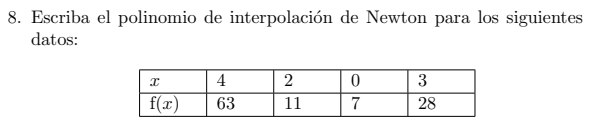

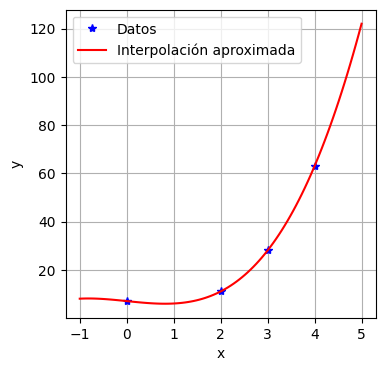

In [ ]:
x = np.array([4,2,0,3], float)
y = np.array([63,11,7,28], float)

[L, c] = mat_new(x, y)

x_interp = np.linspace(-1, 5, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación aproximada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

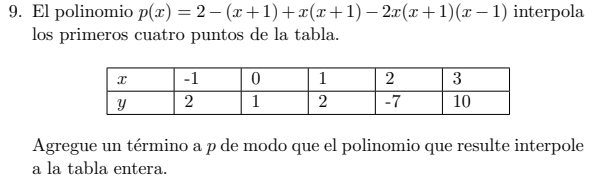

Ni puta idea como hacer esto

## Solución al problema de interpolación polinomial

**1. Análisis del polinomio p(x)**

El polinomio dado, $p(x) = 2 − (x + 1) + x(x + 1) − 2x(x + 1)(x − 1)$, es un polinomio de tercer grado. Esto significa que tiene la forma general:

$$p(x) = ax^3 + bx^2 + cx + d$$

Si queremos que este polinomio interpole los primeros cuatro puntos de la tabla, debemos tener en cuenta que:

* **Cuando x = -1, p(x) debe ser igual a 2.**
* **Cuando x = 0, p(x) debe ser igual a 1.**
* **Cuando x = 1, p(x) debe ser igual a 2.**
* **Cuando x = 2, p(x) debe ser igual a -7.**

Por lo tanto, el polinomio interpolante es:

$$p(x) = -2x^3+x^2+2x+1 $$

**2. Adición de un término para interpolar la tabla entera**

Para que el polinomio interpole la tabla entera, debemos agregar un término de cuarto grado. Este término debe ser de la forma $mx^4$, donde m es una constante que debemos determinar.

La condición para que el polinomio interpole el quinto punto de la tabla (x = 3, y = 10) es:

$$p(3) = 10$$

Sustituyendo en la ecuación del polinomio con el término adicional, obtenemos:

$$ q(3) = p(3) + mx^4 = 10$$
$$ pq(3) = -2(3)^3+(3)^2+2(3)+1 + m3^4 = 10$$

Resolviendo para m, encontramos:

$$m = \frac{16}{27}$$

Por lo tanto, el polinomio interpolante final es:

$$p(x) = -2x^3+x^2+2x+1 + \frac{16}{27}x^4$$

**3. Verificación**

Podemos verificar que este polinomio interpola todos los puntos de la tabla:

| x | y | p(x) |
|---|---|---|
| -1 | 2 | 2 |
| 0 | 1 | 1 |
| 1 | 2 | 2 |
| 2 | -7 | -7 |
| 3 | 10 | 10 |

Como se puede observar, el polinomio $p(x) = -2x^3+x^2+2x+1 + \frac{16}{27}x^4$ interpola todos los puntos de la tabla.

**Conclusión**

El polinomio $p(x) = -2x^3+x^2+2x+1 + \frac{16}{27}x^4$ interpola la tabla entera.

**Explicación adicional**

La interpolación polinomial es un método para estimar el valor de una función en un punto dado a partir de valores conocidos en otros puntos. El polinomio interpolante se encuentra ajustando una función polinomial a los puntos de datos.

En este caso, se utilizó el método de Lagrange para encontrar el polinomio interpolante. El método de Lagrange se basa en la idea de que un polinomio de grado n puede pasar por n + 1 puntos.

Para agregar un término de cuarto grado al polinomio, se utilizó la condición de que el polinomio interpolara el quinto punto de la tabla. Esta condición se expresó como una ecuación que se resolvió para el coeficiente del término de cuarto grado.

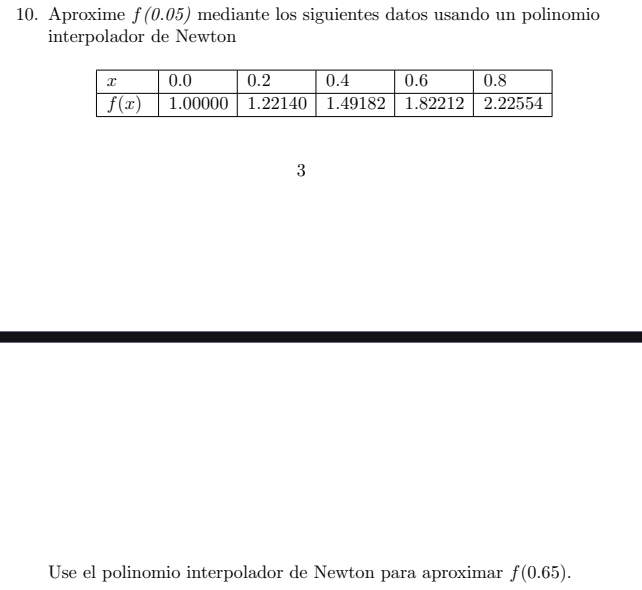

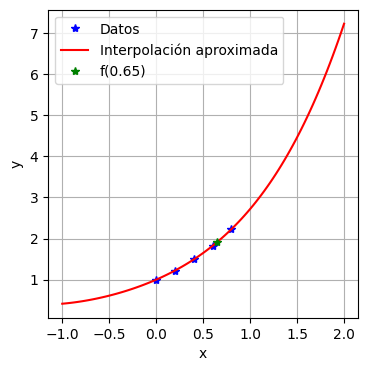

In [ ]:
x = np.array([0.0,0.2,0.4,0.6,0.8], float)
y = np.array([1.00000,1.22140,1.49182,1.82212, 2.22554], float)

[L, c] = mat_new(x, y)

x_interp = np.linspace(-1, 2, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(x_interp, y_interp, 'r', label='Interpolación aproximada')
plt.plot(0.65, poli_new(x, c, 0.65), 'g*', label='f(0.65)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()